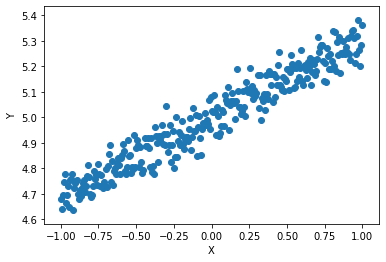

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

np.random.seed(10)  # 指定亂數種子
# 建立測試資料
X = np.linspace(-1, 1, 300)
np.random.shuffle(X)  # 使用亂數打亂資料
Y = 0.3 * X + 5 + np.random.normal(0, 0.05, (300, ))
# 繪出資料的散佈圖
plt.scatter(X, Y)
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

In [159]:
X_train, Y_train = X[:270], Y[:270]     # 訓練資料前270點
X_test, Y_test = X[270:], Y[270:]       # 測試資料後30點

# 建立Keras的Sequential模型
model = Sequential()
model.add(Dense(2, input_dim=1))        # 隱藏層 2個神經元
model.add(Dense(1))                     # 輸出層 1個神經元
# 編譯模型
model.compile(loss="mse", optimizer="sgd", metrics=["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 2)                 4         
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 3         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


In [160]:
# 訓練模型
print("Training ....")
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=30)

Training ....
Train on 216 samples, validate on 54 samples
Epoch 1/10
216/216 [==============================] - 1s 4ms/step - loss: 19.1920 - acc: 0.0000e+00 - val_loss: 11.0863 - val_acc: 0.0000e+00
Epoch 2/10
216/216 [==============================] - 0s 151us/step - loss: 7.1658 - acc: 0.0000e+00 - val_loss: 2.5148 - val_acc: 0.0000e+00
Epoch 3/10
216/216 [==============================] - 0s 147us/step - loss: 1.2849 - acc: 0.0000e+00 - val_loss: 0.2441 - val_acc: 0.0000e+00
Epoch 4/10
216/216 [==============================] - 0s 134us/step - loss: 0.1127 - acc: 0.0000e+00 - val_loss: 0.0202 - val_acc: 0.0000e+00
Epoch 5/10
216/216 [==============================] - 0s 115us/step - loss: 0.0110 - acc: 0.0000e+00 - val_loss: 0.0055 - val_acc: 0.0000e+00
Epoch 6/10
216/216 [==============================] - 0s 121us/step - loss: 0.0038 - acc: 0.0000e+00 - val_loss: 0.0037 - val_acc: 0.0000e+00
Epoch 7/10
216/216 [==============================] - 0s 119us/step - loss: 0.0028 - acc:

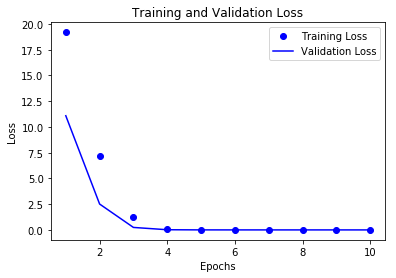

In [161]:
# 顯示訓練和驗證損失
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [162]:
# 測試模型
print("\nTesting ...")
cost = model.evaluate(X_test, Y_test, batch_size=30)
print("Test Cost =", cost)
print("\nHidden Layer ...")
W, b = model.layers[0].get_weights()
print("Weights=", W, "\nbiases=", b)  
print("\nOutput Layer ...")
W, b = model.layers[1].get_weights()
print("Weights=", W, "\nbiases=", b)  


Testing ...
30/30 [==============================] - 0s 142us/step
Test Cost = [0.0022726247552782297, 0.0]

Hidden Layer ...
Weights= [[ 1.2978401 -0.9191184]] 
biases= [-0.8925265 -1.5456991]

Output Layer ...
Weights= [[-1.0168824]
 [-1.7875388]] 
biases= [1.3233074]


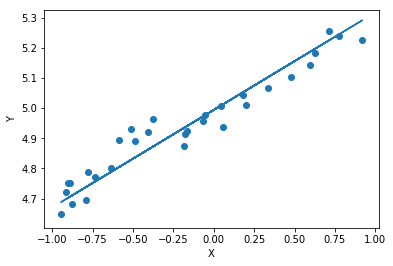

In [163]:
# 預測模型
Y_pred = model.predict(X_test)
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred)
plt.xlabel("X")
plt.ylabel("Y")

plt.show()